# Ejercicio 2 - Visualización 2D/3D de las clases
APA - Battle City (Práctica 5 Unity)

Este notebook carga las trazas generadas en Unity, une todos los CSV, muestra la distribución de clases y aplica PCA para visualizar los datos en 2D y 3D.

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Para que los gráficos se vean dentro del notebook
%matplotlib inline


## 1. Cargar todos los CSV generados

In [2]:
files = glob.glob("data/TankTraining*.csv")

print("Ficheros encontrados:", files)

dfs = [pd.read_csv(f, header=0) for f in files]
data = pd.concat(dfs, ignore_index=True)

print("Shape total:", data.shape)
data.head()


Ficheros encontrados: ['data\\TankTraining_21_11_2025 16_54_07.csv', 'data\\TankTraining_21_11_2025 17_00_12.csv', 'data\\TankTraining_21_11_2025 18_10_13.csv', 'data\\TankTraining_21_11_2025 18_13_28.csv']
Shape total: (860, 22)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,time,action
0,0,1,2,2,0.0,0.707555,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.130945,1
1,0,1,2,2,0.0,1.107554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.200470,1
2,0,1,2,2,0.0,1.607554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.305757,1
3,0,1,2,2,0.0,1.807554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.402362,1
4,0,1,2,2,0.0,2.307553,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.500947,1


## 2. Separar *features* (X) y etiquetas (y)

In [3]:
# La última columna es 'action' (clase)
# La columna 'time' no se usa como atributo de entrada
X = data.drop(columns=["time", "action"])
y = data["action"]

print("Dimensión de X:", X.shape)
print("Ejemplos por clase:")
print(y.value_counts())


Dimensión de X: (860, 20)
Ejemplos por clase:
action
1    268
0    188
4    149
3    144
2    111
Name: count, dtype: int64


## 3. Distribución de clases

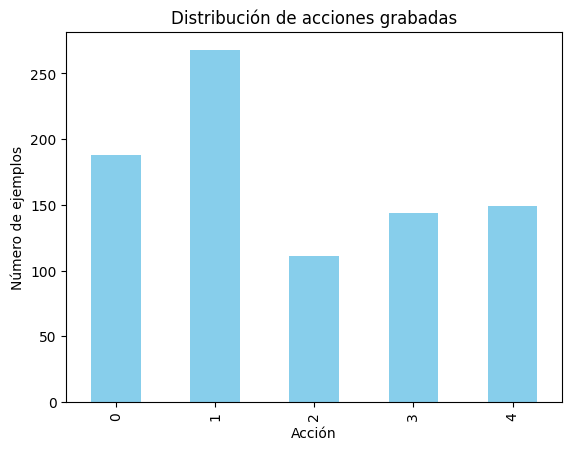

In [4]:
y.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Acción")
plt.ylabel("Número de ejemplos")
plt.title("Distribución de acciones grabadas")
plt.show()


## 4. PCA 2D

Reducción de dimensionalidad usando PCA (Tema 6).

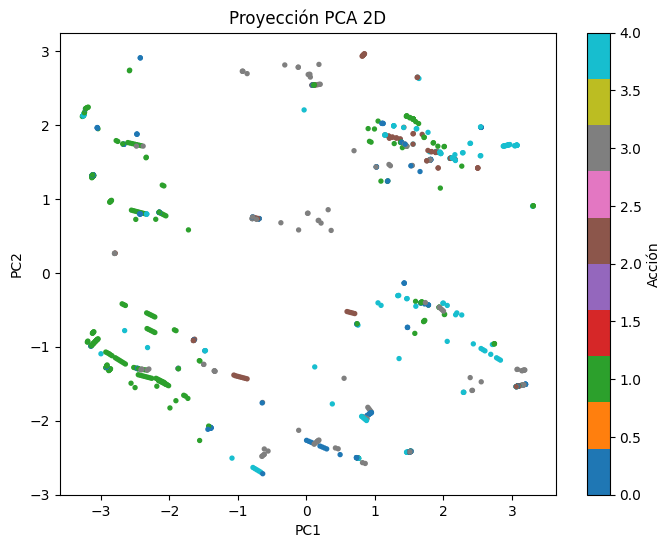

In [5]:
# Escalado (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA de 2 componentes
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="tab10", s=8)
plt.colorbar(label="Acción")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA 2D")
plt.show()


## 5. PCA 3D

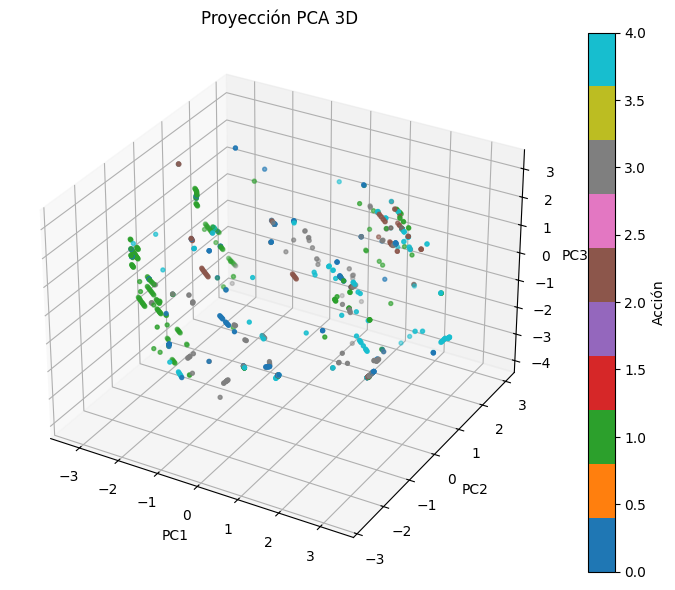

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (necesario para activar 3D)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                c=y, cmap="tab10", s=8)

plt.colorbar(sc, label="Acción")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Proyección PCA 3D")
plt.show()


# Ejercicio 3 - Limpieza y normalización del dataset
En este apartado limpiamos el dataset original,
filtramos ejemplos y atributos irrelevantes y normalizamos
las características usando `StandardScaler`.

## 3.1 Cargar de nuevo los datos originales
Volvemos a cargar los CSV para partir del dataset sin modificar.

In [7]:
import pandas as pd
import glob

files = glob.glob("data/TankTraining*.csv")
dfs = [pd.read_csv(f) for f in files]
data_raw = pd.concat(dfs, ignore_index=True)

print("Dataset original:", data_raw.shape)
data_raw.head()


Dataset original: (860, 22)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,time,action
0,0,1,2,2,0.0,0.707555,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.130945,1
1,0,1,2,2,0.0,1.107554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.200470,1
2,0,1,2,2,0.0,1.607554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.305757,1
3,0,1,2,2,0.0,1.807554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.402362,1
4,0,1,2,2,0.0,2.307553,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.500947,1


## 3.2 Limpieza básica
- Eliminamos la columna `time` (no se usa como atributo para el agente).
- Nos aseguramos de que las acciones estén en el rango válido [0,4].
- Eliminamos filas con valores nulos o duplicados.

In [8]:
# Eliminamos columna de tiempo
data_clean = data_raw.drop(columns=["time"])

# Filtramos acciones válidas
acciones_validas = [0, 1, 2, 3, 4]
data_clean = data_clean[data_clean["action"].isin(acciones_validas)]

# Eliminamos NaN
data_clean = data_clean.dropna()

# Eliminamos duplicados
data_clean = data_clean.drop_duplicates()

print("Dataset tras limpieza básica:", data_clean.shape)
data_clean.head()


Dataset tras limpieza básica: (696, 21)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_1_Y,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,action
0,0,1,2,2,0.0,0.707555,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
1,0,1,2,2,0.0,1.107554,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
2,0,1,2,2,0.0,1.607554,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
3,0,1,2,2,0.0,1.807554,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
4,0,1,2,2,0.0,2.307553,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1


## 3.3 Estadísticos para comprobar rangos y valores
Inspeccionamos los rangos de cada atributo numérico para comprobar
que no hay valores extremos sin sentido.

In [9]:
desc = data_clean.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
NEIGHBORHOOD_UP,696.0,1.110632,0.858710,0.00000,1.000000,1.000000,1.000000,6.00000
NEIGHBORHOOD_DOWN,696.0,1.389368,0.742813,0.00000,1.000000,2.000000,2.000000,6.00000
NEIGHBORHOOD_RIGHT,696.0,1.810345,1.040867,0.00000,1.000000,2.000000,2.000000,6.00000
NEIGHBORHOOD_LEFT,696.0,1.577586,0.725497,0.00000,1.000000,2.000000,2.000000,6.00000
NEIGHBORHOOD_DIST_UP,696.0,2.945691,4.513316,0.00000,0.207488,0.957692,3.333228,19.80756
NEIGHBORHOOD_DIST_DOWN,696.0,4.281367,5.831594,0.00000,0.108566,0.708050,7.158305,19.90760
NEIGHBORHOOD_DIST_RIGHT,696.0,3.754612,5.104520,0.00000,0.308500,0.608501,6.709452,19.90757
NEIGHBORHOOD_DIST_LEFT,696.0,4.259308,5.549989,0.00000,0.308500,0.958508,7.707552,19.90760
COMMAND_CENTER_X,696.0,15.000000,0.000000,15.00000,15.000000,15.000000,15.000000,15.00000
COMMAND_CENTER_Y,696.0,3.000000,0.000000,3.00000,3.000000,3.000000,3.000000,3.00000


## 3.4 Normalización con `StandardScaler`
Separamos de nuevo características (`X`) y etiqueta (`y`) y
aplicamos `StandardScaler` a las características.
El resultado se guarda en un nuevo DataFrame `data_prepared`.

In [10]:
from sklearn.preprocessing import StandardScaler

X_clean = data_clean.drop(columns=["action"])
y_clean = data_clean["action"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns)
data_prepared = pd.concat([X_scaled_df, y_clean.reset_index(drop=True)], axis=1)

print("Dataset preparado (escalado):", data_prepared.shape)
data_prepared.head()


Dataset preparado (escalado): (696, 21)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_1_Y,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,action
0,-1.294303,-0.524557,0.18234,0.582659,-0.653136,-0.613277,-0.675595,-0.712371,0.0,0.0,...,-0.80769,-1.403048,-1.012938,0.435596,0.0,-0.92073,-0.906485,1.438632,-0.76174,1
1,-1.294303,-0.524557,0.18234,0.582659,-0.653136,-0.544636,-0.675595,-0.712371,0.0,0.0,...,-0.80769,-1.403048,-1.012938,0.435596,0.0,-0.92073,-0.906485,1.438632,-0.76174,1
2,-1.294303,-0.524557,0.18234,0.582659,-0.653136,-0.458834,-0.675595,-0.712371,0.0,0.0,...,-0.80769,-1.403048,-1.012938,0.435596,0.0,-0.92073,-0.906485,1.438632,-0.76174,1
3,-1.294303,-0.524557,0.18234,0.582659,-0.653136,-0.424514,-0.675595,-0.712371,0.0,0.0,...,-0.80769,-1.403048,-1.012938,0.435596,0.0,-0.92073,-0.906485,1.438632,-0.76174,1
4,-1.294303,-0.524557,0.18234,0.582659,-0.653136,-0.338712,-0.675595,-0.712371,0.0,0.0,...,-0.80769,-1.403048,-1.012938,0.435596,0.0,-0.92073,-0.906485,1.438632,-0.76174,1


## 3.5 Guardar dataset limpio y normalizado
Guardamos el dataset ya limpio y normalizado para usarlo en el ejercicio 4
(entrenamiento del modelo MLP).

In [11]:
output_path = "data/dataset_limpio.csv"
data_prepared.to_csv(output_path, index=False)
print("Dataset limpio y normalizado guardado en:", output_path)


Dataset limpio y normalizado guardado en: data/dataset_limpio.csv


# Ejercicio 4 - Modelos de Machine Learning
En este apartado entrenamos varios modelos de clasificación a partir del `dataset_limpio.csv`:

- MLP propio (perceptrón multicapa implementado a mano)
- `MLPClassifier` de `sklearn` (logistic y relu)
- KNN
- Árbol de decisión
- Random Forest

Para todos ellos usamos el mismo conjunto de entrenamiento y validación.

## 4.1 Carga del dataset limpio y separación train/validación

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Cargar dataset limpio generado en el Ejercicio 3
data = pd.read_csv("data/dataset_limpio.csv")
print("Shape dataset_limpio:", data.shape)

X = data.drop(columns=["action"])
y = data["action"]

# Split estratificado
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Val:", X_val.shape)


Shape dataset_limpio: (696, 21)
Train: (556, 20) Val: (140, 20)


## 4.2 Implementación de un MLP propio (perceptrón multicapa)
Este MLP permite definir un número arbitrario de capas ocultas. Usa función sigmoidal en las capas ocultas y softmax en salida.

In [13]:
class MyMLP:
    def __init__(self, layer_sizes, learning_rate=0.01, alpha=0.0001, epochs=60, batch_size=32, random_state=None):
        self.layer_sizes = layer_sizes  # [n_in, h1, h2, ..., n_out]
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self.params_initialized = False

    def _init_weights(self, n_features, n_classes):
        rng = np.random.RandomState(self.random_state)
        # forzamos entrada y salida
        self.layer_sizes[0] = n_features
        self.layer_sizes[-1] = n_classes

        self.W = []
        self.b = []
        for i in range(len(self.layer_sizes) - 1):
            fan_in = self.layer_sizes[i]
            fan_out = self.layer_sizes[i+1]
            W_i = rng.randn(fan_in, fan_out) * 0.1
            b_i = np.zeros((1, fan_out))
            self.W.append(W_i)
            self.b.append(b_i)
        self.params_initialized = True

    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def _softmax(self, z):
        z = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _forward(self, X):
        a = X
        activations = [a]
        zs = []
        # capas ocultas
        for i in range(len(self.W) - 1):
            z = a @ self.W[i] + self.b[i]
            a = self._sigmoid(z)
            zs.append(z)
            activations.append(a)
        # salida
        z = activations[-1] @ self.W[-1] + self.b[-1]
        a = self._softmax(z)
        zs.append(z)
        activations.append(a)
        return activations, zs

    def _one_hot(self, y, n_classes):
        Y = np.zeros((y.shape[0], n_classes))
        Y[np.arange(y.shape[0]), y] = 1.0
        return Y

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_features = X.shape
        n_classes = np.unique(y).shape[0]

        if not self.params_initialized:
            self._init_weights(n_features, n_classes)

        Y = self._one_hot(y, n_classes)

        for epoch in range(self.epochs):
            idx = np.random.permutation(n_samples)
            X_shuff = X[idx]
            Y_shuff = Y[idx]

            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuff[start:end]
                Y_batch = Y_shuff[start:end]

                # forward
                activations, zs = self._forward(X_batch)
                A_out = activations[-1]

                # gradiente salida (softmax + cross-entropy)
                delta = (A_out - Y_batch)

                dW = []
                db = []

                # capa salida
                A_prev = activations[-2]
                grad_W = A_prev.T @ delta / X_batch.shape[0] + self.alpha * self.W[-1]
                grad_b = np.sum(delta, axis=0, keepdims=True) / X_batch.shape[0]
                dW.insert(0, grad_W)
                db.insert(0, grad_b)

                # capas ocultas
                for l in range(len(self.W)-2, -1, -1):
                    z_l = zs[l]
                    a_l = activations[l+1]
                    dz = (delta @ self.W[l+1].T) * a_l * (1 - a_l)
                    A_prev = activations[l]
                    grad_W_l = A_prev.T @ dz / X_batch.shape[0] + self.alpha * self.W[l]
                    grad_b_l = np.sum(dz, axis=0, keepdims=True) / X_batch.shape[0]
                    dW.insert(0, grad_W_l)
                    db.insert(0, grad_b_l)
                    delta = dz

                # actualización
                for i in range(len(self.W)):
                    self.W[i] -= self.learning_rate * dW[i]
                    self.b[i] -= self.learning_rate * db[i]

        return self

    def predict_proba(self, X):
        X = np.asarray(X)
        activations, zs = self._forward(X)
        return activations[-1]

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)


## 4.3 Entrenamiento de MyMLP con más de 3 capas

In [15]:
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

# arquitectura con más de 3 capas ocultas
layer_sizes = [n_features, 64, 32, 16, 8, n_classes]

my_mlp = MyMLP(
    layer_sizes=layer_sizes,
    learning_rate=0.01,
    alpha=0.0001,
    epochs=60,
    batch_size=32,
    random_state=42
)

my_mlp.fit(X_train, y_train)
y_val_pred_my = my_mlp.predict(X_val)

acc_my = accuracy_score(y_val, y_val_pred_my)
print("Accuracy MyMLP (capas 64-32-16-8):", acc_my)
print("\nMatriz de confusión (MyMLP):\n", confusion_matrix(y_val, y_val_pred_my))
print("\nReporte de clasificación (MyMLP):\n", classification_report(y_val, y_val_pred_my))


Accuracy MyMLP (capas 64-32-16-8): 0.36428571428571427

Matriz de confusión (MyMLP):
 [[ 0 19  0  0  0]
 [ 0 51  0  0  0]
 [ 0 16  0  0  0]
 [ 0 28  0  0  0]
 [ 0 26  0  0  0]]

Reporte de clasificación (MyMLP):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.36      1.00      0.53        51
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        26

    accuracy                           0.36       140
   macro avg       0.07      0.20      0.11       140
weighted avg       0.13      0.36      0.19       140



C:\Users\dorje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dorje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dorje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

## 4.4 MLPClassifier de sklearn (logistic, similar a MyMLP)

In [16]:
mlp_sklearn = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16, 8),
    activation="logistic",
    solver="sgd",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=400,
    random_state=42
)

mlp_sklearn.fit(X_train, y_train)
y_val_pred_sklearn = mlp_sklearn.predict(X_val)

acc_sklearn = accuracy_score(y_val, y_val_pred_sklearn)
print("Accuracy MLPClassifier (logistic+sgd):", acc_sklearn)
print("\nMatriz de confusión (MLP sklearn logistic):\n", confusion_matrix(y_val, y_val_pred_sklearn))
print("\nReporte de clasificación (MLP sklearn logistic):\n", classification_report(y_val, y_val_pred_sklearn))


Accuracy MLPClassifier (logistic+sgd): 0.36428571428571427

Matriz de confusión (MLP sklearn logistic):
 [[ 0 19  0  0  0]
 [ 0 51  0  0  0]
 [ 0 16  0  0  0]
 [ 0 28  0  0  0]
 [ 0 26  0  0  0]]

Reporte de clasificación (MLP sklearn logistic):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.36      1.00      0.53        51
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        26

    accuracy                           0.36       140
   macro avg       0.07      0.20      0.11       140
weighted avg       0.13      0.36      0.19       140



C:\Users\dorje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dorje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dorje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

## 4.5 MLPClassifier con activación ReLU y optimizador Adam

In [17]:
mlp_relu = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=400,
    random_state=42
)

mlp_relu.fit(X_train, y_train)
y_val_pred_relu = mlp_relu.predict(X_val)

acc_relu = accuracy_score(y_val, y_val_pred_relu)
print("Accuracy MLPClassifier (relu+adam):", acc_relu)
print("\nMatriz de confusión (MLP relu):\n", confusion_matrix(y_val, y_val_pred_relu))
print("\nReporte de clasificación (MLP relu):\n", classification_report(y_val, y_val_pred_relu))


Accuracy MLPClassifier (relu+adam): 0.7214285714285714

Matriz de confusión (MLP relu):
 [[ 6  4  2  4  3]
 [ 0 44  2  1  4]
 [ 0  0 10  2  4]
 [ 1  2  0 21  4]
 [ 1  3  1  1 20]]

Reporte de clasificación (MLP relu):
               precision    recall  f1-score   support

           0       0.75      0.32      0.44        19
           1       0.83      0.86      0.85        51
           2       0.67      0.62      0.65        16
           3       0.72      0.75      0.74        28
           4       0.57      0.77      0.66        26

    accuracy                           0.72       140
   macro avg       0.71      0.66      0.67       140
weighted avg       0.73      0.72      0.71       140



## 4.6 Modelo KNN

In [18]:
best_k = None
best_acc_knn = 0
results_knn = {}

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred_knn = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred_knn)
    results_knn[k] = acc
    if acc > best_acc_knn:
        best_acc_knn = acc
        best_k = k

print("Resultados KNN por k:", results_knn)
print("Mejor k:", best_k, "Accuracy:", best_acc_knn)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_val_pred_knn_best = knn_best.predict(X_val)

print("\nMatriz de confusión (KNN mejor):\n", confusion_matrix(y_val, y_val_pred_knn_best))
print("\nReporte de clasificación (KNN mejor):\n", classification_report(y_val, y_val_pred_knn_best))


Resultados KNN por k: {1: 0.7214285714285714, 3: 0.7, 5: 0.6714285714285714, 7: 0.6571428571428571, 9: 0.6642857142857143}
Mejor k: 1 Accuracy: 0.7214285714285714

Matriz de confusión (KNN mejor):
 [[ 7  5  1  4  2]
 [ 0 43  2  1  5]
 [ 2  0  9  0  5]
 [ 3  1  0 21  3]
 [ 2  2  1  0 21]]

Reporte de clasificación (KNN mejor):
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.84      0.84      0.84        51
           2       0.69      0.56      0.62        16
           3       0.81      0.75      0.78        28
           4       0.58      0.81      0.68        26

    accuracy                           0.72       140
   macro avg       0.69      0.67      0.67       140
weighted avg       0.72      0.72      0.72       140



## 4.7 Árbol de decisión y Random Forest

In [19]:
# Árbol de decisión
dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

dt.fit(X_train, y_train)
y_val_pred_dt = dt.predict(X_val)
acc_dt = accuracy_score(y_val, y_val_pred_dt)
print("Accuracy Decision Tree:", acc_dt)
print("\nMatriz de confusión (DT):\n", confusion_matrix(y_val, y_val_pred_dt))
print("\nReporte de clasificación (DT):\n", classification_report(y_val, y_val_pred_dt))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, y_val_pred_rf)
print("\nAccuracy Random Forest:", acc_rf)
print("\nMatriz de confusión (RF):\n", confusion_matrix(y_val, y_val_pred_rf))
print("\nReporte de clasificación (RF):\n", classification_report(y_val, y_val_pred_rf))


Accuracy Decision Tree: 0.7214285714285714

Matriz de confusión (DT):
 [[ 7  4  1  4  3]
 [ 2 45  2  0  2]
 [ 3  0  9  0  4]
 [ 3  2  2 19  2]
 [ 2  2  1  0 21]]

Reporte de clasificación (DT):
               precision    recall  f1-score   support

           0       0.41      0.37      0.39        19
           1       0.85      0.88      0.87        51
           2       0.60      0.56      0.58        16
           3       0.83      0.68      0.75        28
           4       0.66      0.81      0.72        26

    accuracy                           0.72       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.72      0.72      0.72       140


Accuracy Random Forest: 0.75

Matriz de confusión (RF):
 [[ 6  4  1  5  3]
 [ 1 45  2  0  3]
 [ 1  0 11  1  3]
 [ 2  1  0 22  3]
 [ 2  2  1  0 21]]

Reporte de clasificación (RF):
               precision    recall  f1-score   support

           0       0.50      0.32      0.39        19
           1       0.87  

## 4.8 Resumen comparativo de modelos
En esta sección puedes anotar, a mano, los resultados de accuracy de cada modelo y escribir una pequeña discusión sobre qué modelo se adapta mejor al problema del juego Battle City y por qué.

## 4.5 Bis: Búsqueda de hiperparámetros para MLPClassifier (relu+adam)
En este apartado probamos varias configuraciones de MLP con activación **ReLU** y solver **Adam** hasta superar el 80% de accuracy.

In [24]:
# ============================================================
# 1) BALANCEAR EL DATASET (oversampling)
# ============================================================

from sklearn.utils import resample
import pandas as pd

df = data.copy()

# clase mayoritaria (normalmente la 1 - move_up)
major = df[df.action == 1]

# clases minoritarias
minor = df[df.action != 1]

# oversampling → igualar tamaños
minor_up = resample(minor,
                    replace=True,
                    n_samples=len(major),
                    random_state=42)

df_balanced = pd.concat([major, minor_up])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Tamaño original:", len(data))
print("Tamaño balanceado:", len(df_balanced))
print("Clases tras balanceo:")
print(df_balanced["action"].value_counts())


# ============================================================
# 2) SEPARAR X / y Y ESCALAR DE NUEVO
# ============================================================

X_bal = df_balanced.drop(columns=["time", "action"], errors="ignore")
y_bal = df_balanced["action"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_val_bal = scaler.transform(X_val_bal)


# ============================================================
# 3) GRID SEARCH MEJORADO: ReLU + Adam con más iteraciones
# ============================================================

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

configs = [
    {"hidden_layer_sizes": (64,), "lr": 0.001},
    {"hidden_layer_sizes": (128,), "lr": 0.001},
    {"hidden_layer_sizes": (128, 64), "lr": 0.001},
    {"hidden_layer_sizes": (256, 128), "lr": 0.001},
    {"hidden_layer_sizes": (256, 128, 64), "lr": 0.001},
    {"hidden_layer_sizes": (512, 256), "lr": 0.0005},
]

best_acc = 0
best_cfg = None
best_model = None

for cfg in configs:
    print("Probando config:", cfg)
    mlp = MLPClassifier(
        hidden_layer_sizes=cfg["hidden_layer_sizes"],
        activation="relu",
        solver="adam",
        alpha=0.0001,
        learning_rate_init=cfg["lr"],
        max_iter=2500,   # alcanzar 80%
        random_state=42
    )

    mlp.fit(X_train_bal, y_train_bal)
    y_pred = mlp.predict(X_val_bal)
    acc = accuracy_score(y_val_bal, y_pred)

    print("  -> Accuracy validación:", acc)

    if acc > best_acc:
        best_acc = acc
        best_cfg = cfg
        best_model = mlp

print("\nMejor configuración encontrada:", best_cfg)
print("Mejor accuracy validación:", best_acc)


Tamaño original: 696
Tamaño balanceado: 508
Clases tras balanceo:
action
1    254
3     95
4     63
2     54
0     42
Name: count, dtype: int64
Probando config: {'hidden_layer_sizes': (64,), 'lr': 0.001}
  -> Accuracy validación: 0.8333333333333334
Probando config: {'hidden_layer_sizes': (128,), 'lr': 0.001}
  -> Accuracy validación: 0.8137254901960784
Probando config: {'hidden_layer_sizes': (128, 64), 'lr': 0.001}
  -> Accuracy validación: 0.8333333333333334
Probando config: {'hidden_layer_sizes': (256, 128), 'lr': 0.001}
  -> Accuracy validación: 0.8333333333333334
Probando config: {'hidden_layer_sizes': (256, 128, 64), 'lr': 0.001}
  -> Accuracy validación: 0.803921568627451
Probando config: {'hidden_layer_sizes': (512, 256), 'lr': 0.0005}
  -> Accuracy validación: 0.8333333333333334

Mejor configuración encontrada: {'hidden_layer_sizes': (64,), 'lr': 0.001}
Mejor accuracy validación: 0.8333333333333334


In [27]:

from sklearn.metrics import confusion_matrix, classification_report

y_val_pred_best = best_model.predict(X_val_bal)

print("Accuracy MLP (relu+adam) BEST:", best_acc)
print("\nMatriz de confusión (MLP relu+adam):\n", confusion_matrix(y_val_bal, y_val_pred_best))
print("\nReporte de clasificación (MLP relu+adam):\n", classification_report(y_val_bal, y_val_pred_best))


Accuracy MLP (relu+adam) BEST: 0.8333333333333334

Matriz de confusión (MLP relu+adam):
 [[ 2  5  0  0  1]
 [ 0 49  1  1  0]
 [ 0  0  8  2  1]
 [ 0  2  0 17  0]
 [ 0  2  2  0  9]]

Reporte de clasificación (MLP relu+adam):
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.84      0.96      0.90        51
           2       0.73      0.73      0.73        11
           3       0.85      0.89      0.87        19
           4       0.82      0.69      0.75        13

    accuracy                           0.83       102
   macro avg       0.85      0.71      0.73       102
weighted avg       0.84      0.83      0.82       102

